In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data1 = pd.read_csv('model_data.csv')
data1.head()

# filter out gpt2
data = data1.loc[data1['Domain'] != 'GPT-2']

In [3]:
# number of unique model types
len(data['Domain'].unique())

21

## K-means clustering to identify which models share similarities

In [5]:
from sklearn.cluster import KMeans

# number of clusters
n_clusters = 22  # start with 4 clusters

kmeans = KMeans(n_clusters = n_clusters)
kmeans.fit(data[['learning_rate','num_layers']])

# predictions from kmeans
pred = kmeans.predict(data[['learning_rate','num_layers']])
df = pd.DataFrame(data[['Domain', 'learning_rate','num_layers']])
df['cluster'] = pred
df.columns = ['Domain','learning_rate', 'num_layers', 'cluster']

AttributeError: 'NoneType' object has no attribute 'split'

In [32]:
#df.head()

In [41]:
df.groupby(['cluster'])['Domain'].value_counts()

cluster  Domain      
0        BERT             6
         ELECTRA          3
         FNet             1
         MiniLM           1
         SegFormer        1
         XLNet            1
1        T5               1
2        BERT             1
3        BERT             7
4        LED              1
5        BART             3
         M2M100           1
6        LaBSE            1
7        BERT             2
8        PEGASUS          1
9        T5               2
         XLSR             1
10       XLM-RoBERTa      1
11       BERT            13
         MPNet            1
         MiniLM           1
         XLM-RoBERTa      1
         data2vec         1
12       BERT             1
13       T5               2
14       T5               3
         BART             1
15       BERT            15
         XtremeDistil     1
16       BERT             1
17       XLSR             1
18       XLSR             3
         XLMR             1
         wav2vec          1
19       LayoutLM         

## Logistic regression

In [4]:
from sklearn.linear_model import LogisticRegression

In [6]:
# separate factors from response variable
X = data.iloc[:, 3:32].values    # predictors
y = data.iloc[:, 1].values     # repsonse var

In [7]:
from sklearn.model_selection import train_test_split

# train/test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [9]:
# Fitting Logistic Regression To the training set
from sklearn.linear_model import LogisticRegression 

In [10]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

C:\Users\roryb\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

https://machinelearningmastery.com/multinomial-logistic-regression-with-python/

In [17]:
# separate factors from response variable
X = data.iloc[:, 3:]#.values    # predictors
y = data.iloc[:, 1].values     # repsonse var

In [21]:
X.columns

Index(['learning_rate', 'train_batch_size', 'eval_batch_size', 'num_epochs',
       'num_layers', 'num_weights_1', 'num_weights_2', 'num_weights_3',
       'num_weights_4', 'num_weights_5', 'num_weights_6', 'num_weights_7',
       'num_weights_8', 'num_weights_9', 'num_weights_10', 'num_weights_11',
       'num_weights_12', 'num_weights_13', 'num_weights_14', 'num_weights_15',
       'num_weights_16', 'num_weights_17', 'num_weights_18', 'num_weights_19',
       'num_weights_20', 'num_weights_21', 'num_weights_22', 'num_weights_23',
       'num_weights_24', 'num_weights_25'],
      dtype='object')

In [9]:
# evaluate multinomial logistic regression model
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

# define the multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')

# define the model evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluate the model and collect the scores
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

# report the model performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

NameError: name 'LogisticRegression' is not defined

### Hierarchical clustering (decision tree)

In [10]:
from sklearn.preprocessing import StandardScaler

# create a StandardScaler object and fit it to the data
scaler = StandardScaler()
scaler.fit(X)

# transform the data to have zero mean and unit variance
X_normalized = scaler.transform(X)

# print the normalized data
print(X_normalized)

[[-0.12767885 -0.66165532 -0.62473407 ...  0.23473456  0.23473456
  -0.11486419]
 [-0.21441282  0.61306235  0.65537498 ... -0.74186509 -0.74186509
  -0.26742472]
 [-0.08431187 -0.98033473 -0.94476134 ... -2.57298943 -2.57298943
  -0.55347572]
 ...
 [-0.2577798   5.71193304  5.77581119 ...  0.23473456  0.23473456
  -0.11486419]
 [-0.2577798  -0.23674943 -0.19803105 ...  0.23473456  0.23473456
  -0.11486419]
 [-0.2577798   0.18815646  0.22867196 ...  0.23473456  0.23473456
  -0.11486419]]


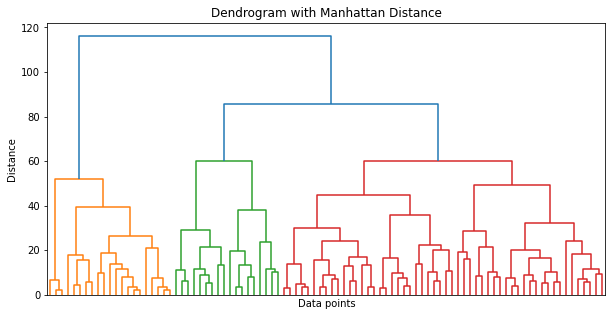

In [38]:
# import necessary libraries
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# load data and prepare it for clustering
# using X from previous cell

# choose a distance metric and linkage method
distance_metric = 'manhattan'
linkage_method = 'average'

# fit the hierarchical clustering algorithm
cluster = AgglomerativeClustering(n_clusters=None, distance_threshold=0, linkage=linkage_method, affinity=distance_metric)
cluster.fit(X_normalized)

# plot the dendrogram
from scipy.cluster.hierarchy import dendrogram
fig = plt.figure(figsize=(10, 5))
plt.title('Dendrogram with Manhattan Distance')
plt.xlabel('Data points')
plt.ylabel('Distance')
Z = linkage(cluster.children_, linkage_method)
dendrogram(Z, p=10, truncate_mode='level', no_labels=True)
plt.show()
fig.savefig('dendrogram_manhattan.png', format='png', dpi=600)

In [34]:
# choose the optimal number of clusters and assign cluster labels to the data points
n_clusters = 3 # choose based on the dendrogram structure and/or other evaluation metrics
labels = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method, affinity=distance_metric).fit_predict(X)

In [35]:
labels_classes = pd.DataFrame({'domain':y, 'tree_labels':labels})
pd.DataFrame(labels_classes.groupby('tree_labels')['domain'].value_counts())

domain
tree_labels domain              
0           BERT              56
            T5                 7
            XLSR               5
            BART               4
            ELECTRA            3
            MiniLM             2
            XLM-RoBERTa        2
            ConvNeXT           1
            FNet               1
            LED                1
            LayoutLM           1
            M2M100             1
            MPNet              1
            PEGASUS            1
            SegFormer          1
            XLMR               1
            XLNet              1
            XtremeDistil       1
            data2vec           1
            wav2vec            1
1           LaBSE              1
2           T5                 1